In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [69]:
training_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report, confusion_matrix, precision_score, recall_score,f1_score, confusion_matrix,roc_curve, auc

women=training_data.loc[training_data.Sex=='female']['Survived']
print(sum(women)/len(women))

0.7420382165605095


In [71]:
def process_data(data):
    data=data.drop(['Name','Ticket'],axis=1)
    
    data['Age']=data['Age'].fillna(data['Age'].median())
    data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
    data['Cabin']=data['Cabin'].fillna('unknown')
    
    data['Deck']=data['Cabin'].str[0]
    data['Deck']=data['Deck'].replace('u','Unknown')
    data['Has_cabin']=(data['Cabin']!='unknown').astype(int)
    data['Num_cabins']=data['Cabin'].str.count(' ')+1
    
    data=pd.get_dummies(data,columns=['Embarked','Sex','Deck'],drop_first=False)

    data=data.drop('Cabin',axis=1)
    return  data


In [72]:
training_data=process_data(training_data)
test_data=process_data(test_data)

X = training_data.drop('Survived', axis=1)
y = training_data['Survived']
X_test = test_data

X_test = X_test.reindex(columns=X.columns). fillna(0)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_testing = scaler.transform(X_testing)


test_data


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Has_cabin,Num_cabins,Embarked_C,Embarked_Q,...,Sex_female,Sex_male,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Unknown
0,892,3,34.5,0,0,7.8292,0,1,False,True,...,False,True,False,False,False,False,False,False,False,True
1,893,3,47.0,1,0,7.0000,0,1,False,False,...,True,False,False,False,False,False,False,False,False,True
2,894,2,62.0,0,0,9.6875,0,1,False,True,...,False,True,False,False,False,False,False,False,False,True
3,895,3,27.0,0,0,8.6625,0,1,False,False,...,False,True,False,False,False,False,False,False,False,True
4,896,3,22.0,1,1,12.2875,0,1,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0,1,False,False,...,False,True,False,False,False,False,False,False,False,True
414,1306,1,39.0,0,0,108.9000,1,1,True,False,...,True,False,False,False,True,False,False,False,False,False
415,1307,3,38.5,0,0,7.2500,0,1,False,False,...,False,True,False,False,False,False,False,False,False,True
416,1308,3,27.0,0,0,8.0500,0,1,False,False,...,False,True,False,False,False,False,False,False,False,True


In [76]:
model=LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_training,y_training)

LogisticRegression(class_weight='balanced', max_iter=1000)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Validation accuracy: 0.6257
precision: 0.7333
recall: 0.1486
F1 score: 0.2472
ROC-AUC score: 0.7686


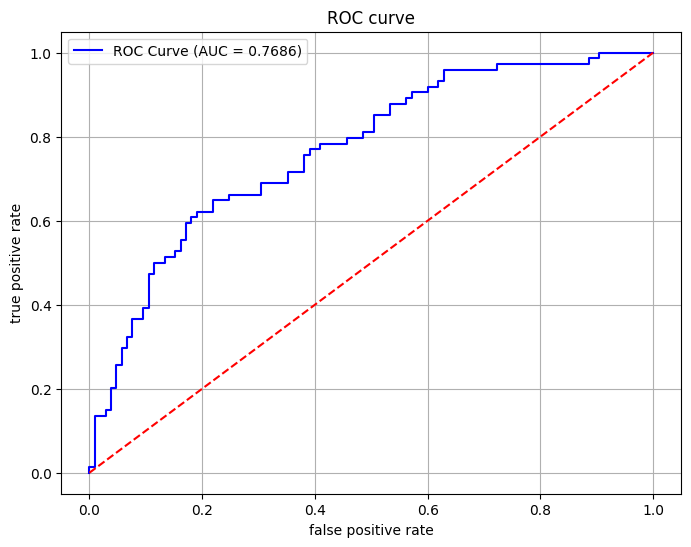

In [77]:
y_valid_pred = model.predict(X_valid)
y_valid_proba = model.predict_proba(X_valid)[:, 1]  # Get probability scores for ROC-AUC

# Compute metrics
accuracy = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)
roc_auc = roc_auc_score(y_valid, y_valid_proba)

# Print results
print(f"Validation accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")
print(f"ROC-AUC score: {roc_auc:.4f}")


fpr, tpr, _ = roc_curve(y_valid, y_valid_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], linestyle='dashed', color='red')  # Diagonal line
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.legend()
plt.grid()
plt.show()

In [75]:
y_pred = model.predict(X_testing)
output=pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':y_pred})
output.to_csv('submission.csv',index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
